In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression

diabetes = datasets.load_diabetes(scaled=False)
X = diabetes.data
y = diabetes.target

def gaussian(x, u, sigma):
  return(np.exp(-0.5 * np.linalg.norm(x-u) / sigma))

N, p = X.shape
print(N, p)



442 10


In [ ]:
print(y)

In [ ]:
print(y.shape)

(442,)


**Design Matrix**:The design matrix, often denoted as 𝑈
U, is a matrix that contains the values of basis functions evaluated at each data point with respect to each basis function center. Each row of the design matrix corresponds to a data point, and each column corresponds to a basis function. The elements of the matrix are the evaluations of the basis functions at the data points.

Text(0, 0.5, 'Prediction')

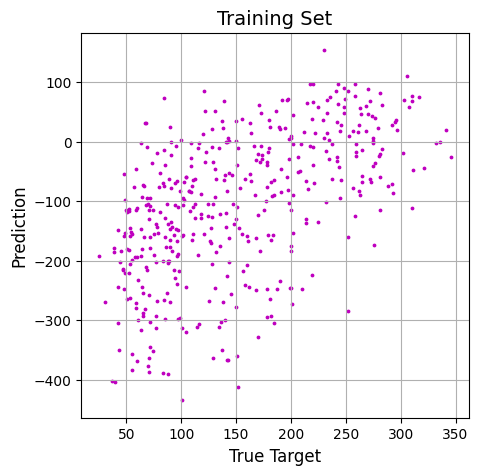

In [2]:
# Space for design matrix
#
M = 200 #number of basis functions in the model
U = np.zeros((N,M)) # U is the design matrix

# Basis function locations at random
# Basis function is used to used to represent the input data in a higher-dimensional space.
C = np.random.randn(M,p)

# Basis function range as distance between two random data
#
x1 = X[np.floor(np.random.rand()*N).astype(int),:]
x2 = X[np.floor(np.random.rand()*N).astype(int),:]
sigma = np.linalg.norm(x1-x2)

# Construct the design matrix
#
for i in range(N):
  for j in range(M):
    U[i,j] = gaussian(X[i,:], C[j,:], sigma)

# X[i, :] selects the entire row i of the matrix X. It returns all the elements in row i
# C[j, :] selects the entire row j of the matrix C. It returns all the elements in row j

# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y

# Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)


In [ ]:
print(C)

[[ 0.86850617 -0.76854721  1.78797976 ... -0.53122239  0.22358646
  -0.69323225]
 [-0.46958303  2.34235899 -1.51526622 ...  0.17091661 -0.54545144
  -0.40587467]
 [ 1.17577281  1.42558739 -1.18812354 ...  0.83445104 -0.75206003
   1.29731645]
 ...
 [-0.09990541  0.75067641  1.17205815 ...  1.4784846  -0.7264822
  -0.80891979]
 [-0.616977    0.17658289 -1.69711319 ... -0.98617093 -0.90919455
   0.68619757]
 [-0.74005966 -0.03825422 -0.55435788 ...  1.70531371 -1.36139687
   1.27215016]]


In [ ]:
print(C.shape)

(200, 10)


In [ ]:
print(U)

[[0.25038965 0.24769715 0.25084948 ... 0.24962284 0.2487519  0.25029416]
 [0.23036951 0.227685   0.23058412 ... 0.22995269 0.22852992 0.23047984]
 [0.25135782 0.24849231 0.25182945 ... 0.2505679  0.24953972 0.25118266]
 ...
 [0.23434476 0.23182286 0.23487357 ... 0.23370203 0.23293171 0.23442181]
 [0.20141871 0.19920611 0.20171532 ... 0.20104866 0.20020432 0.20167376]
 [0.15273042 0.15095113 0.15296587 ... 0.15264123 0.15158179 0.15316526]]


In [ ]:
print(x1, x2)

[ 47.       1.      30.4    120.     199.     120.      46.       4.
   5.1059  87.    ] [ 57.       1.      23.3     88.     155.      63.6     78.       2.
   4.2047  78.    ]


In [ ]:
print("mean =", np.mean(X, axis=0))
print("std = ", np.std(X, axis=0))

mean = [ 48.51809955   1.46832579  26.37579186  94.64701357 189.14027149
 115.43914027  49.78846154   4.07024887   4.64141086  91.260181  ]
std =  [13.09419021  0.49899574  4.41312086 13.81562831 34.56888013 30.37865755
 12.91956242  1.28898929  0.52179929 11.48332247]


Improvements

In [3]:
#normalizing the feaures with mean of 0 and standard deviation of 1

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

Xnorm = (X - mean) / std


In [4]:
print("mean =", np.mean(Xnorm, axis=0))
print("std = ", np.std(Xnorm, axis=0))

mean = [-4.62174291e-17  2.42641503e-16 -4.68956196e-15 -9.29874579e-16
 -2.84840025e-16  8.52761803e-16 -1.01477399e-16 -2.94133747e-16
  1.93149292e-15  2.88387966e-16]
std =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
num_randn = 100 # Number of pairs to consider

# Calculate the average pairwise distance by repeating the process for several pairs
pairwise_distances = []
for _ in range(num_randn):
    # Select two random indices
    index1 = np.random.randint(0, N)
    index2 = np.random.randint(0, N)
    # Get the corresponding rows from X_normalized
    x1 = Xnorm[index1, :]
    x2 = Xnorm[index2, :]
    # Calculate the Euclidean distance and append to the list
    pairwise_distances.append(np.linalg.norm(x1 - x2)) #can't visualize tis in a 2d space

# Calculate the average pairwise distance
sigma = np.mean(pairwise_distances)

In [6]:
print("new value of sigma =", sigma)

new value of sigma = 4.064470853194219


**K emans clustering**
It aims to partition a dataset into K clusters where each data point belongs to the cluster with the nearest mean (center), serving as a prototype of the cluster. The algorithm iteratively assigns data points to the nearest cluster center and updates the cluster centers based on the mean of the data points assigned to each cluster.



In [7]:
#cluster the data using K-means clustering and set basis function locations to the cluster centers
# the centr of the distribution will be there
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=M, random_state=0).fit(Xnorm)
C_new = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
a = np.split(Xnorm, 13) # split X norm into 13 equal parts
Xtr = a[0:11] #selects the subarrays at indices 0 to 10 (11 subarrays in total) from the list a and assigns them to the variable Xtr.
Xte = a[12]
np.asarray(Xtr)
np.asarray(Xte)

In [9]:
Xtr = np.concatenate(Xtr)

In [10]:
print(Xtr.shape)


N_new, p_new = Xtr.shape

(374, 10)


In [ ]:
print(ytr.shape)

In [11]:
b = np.split(y, 13)
ytr = b[0:11]
yte = b[12]
np.asarray(ytr)
np.asarray(yte)

ytr = np.concatenate(ytr)

In [12]:
U = np.zeros((len(Xtr),M))

Text(0, 0.5, 'Prediction')

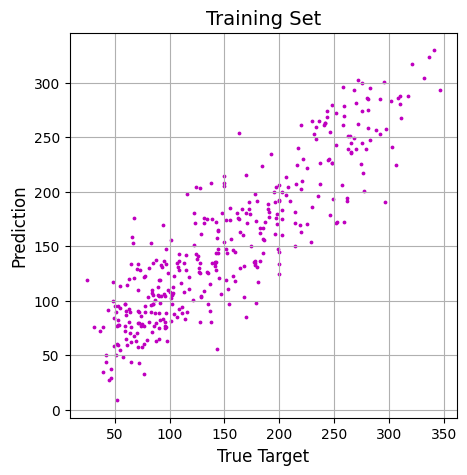

In [13]:
# Construct the design matrix
#
for i in range(N_new):
    for j in range(M):
        #U[i,j] = gaussian(Xnorm[i,:], C[j,:], sigma) #
        U[i,j] = gaussian(Xtr[i,:], C[j,:], sigma) #

# Pseudo inverse solution for linear part
#
#l = np.linalg.inv(U.T @ U) @ U.T @ y
l = np.linalg.inv(U.T @ U) @ U.T @ ytr

# Predicted values on training data
#
yh = U @ l

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(ytr, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

In [ ]:
print(yh.shape)
print(ytr.shape)

(374,)
(398,)


Text(0, 0.5, 'Prediction')

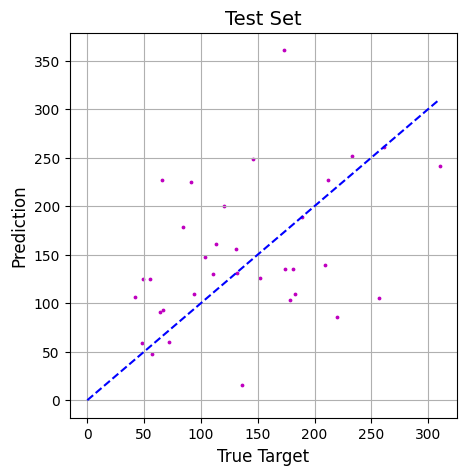

In [14]:
# prompt: write a code to check the test set performance as above

N_te, p_te = Xte.shape
U_te = np.zeros((len(Xte),M))
# Construct the design matrix
#
for i in range(N_te):
    for j in range(M):
        #U[i,j] = gaussian(Xnorm[i,:], C[j,:], sigma) #
        U_te[i,j] = gaussian(Xte[i,:], C[j,:], sigma) #

# Predicted values on training data
#
yh_te = U_te @ l

yte = yte.reshape(-1, 1)

fig, ax = plt.subplots(figsize=(5,5))

# Generate x values for the line
x_line = np.linspace(0, np.max(yte), 100)
# Calculate corresponding y values
y_line =  x_line

# Plot the line
ax.plot(x_line, y_line, color='blue', linestyle='--')


ax.scatter(yte, yh_te, c='m', s=3)
ax.grid(True)
ax.set_title("Test Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)


In [ ]:
print(yh_te.shape)

(34,)


In [ ]:
print(yte.shape)


(44,)


**ten-fold cross validation**

**Part 3**

Kernal trick - kernal functions

In [ ]:
from sklearn.model_selection import KFold

# Define the number of folds
n_splits = 10

# Initialize KFold object
kf = KFold(n_splits=n_splits)

# Iterate over folds
for train_index, test_index in kf.split(Xnorm):
    # Get train and test data
    X_train, X_test = Xnorm[train_index], Xnorm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Construct the design matrix for training data
    U_train = np.zeros((len(X_train), M))
    for i in range(len(X_train)):
        for j in range(M):
            U_train[i, j] = gaussian(X_train[i, :], C[j, :], sigma)

    # Pseudo inverse solution for linear part
    l = np.linalg.inv(U_train.T @ U_train) @ U_train.T @ y_train

    # Construct the design matrix for test data
    U_test = np.zeros((len(X_test), M))
    for i in range(len(X_test)):
        for j in range(M):
            U_test[i, j] = gaussian(X_test[i, :], C[j, :], sigma)

    # Predicted values on test data
    yh_test = U_test @ l

    # Plotting (modify as needed)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.scatter(y_test, yh_test, c='m', s=3)
    ax.grid(True)
    ax.set_title("Test Set", fontsize=14)
    ax.set_xlabel("True Target", fontsize=12)
    ax.set_ylabel("Prediction", fontsize=12)
    plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize lists to store performance metrics
mse_scores = []
r2_scores = []

# Iterate over folds
for train_index, test_index in kf.split(Xnorm):
    # Get train and test data
    X_train, X_test = Xnorm[train_index], Xnorm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Construct the design matrix for training data
    U_train = np.zeros((len(X_train), M))
    for i in range(len(X_train)):
        for j in range(M):
            U_train[i, j] = gaussian(X_train[i, :], C[j, :], sigma)

    # Pseudo inverse solution for linear part
    l = np.linalg.inv(U_train.T @ U_train) @ U_train.T @ y_train

    # Construct the design matrix for test data
    U_test = np.zeros((len(X_test), M))
    for i in range(len(X_test)):
        for j in range(M):
            U_test[i, j] = gaussian(X_test[i, :], C[j, :], sigma)

    # Predicted values on test data
    yh_test = U_test @ l

    # Calculate performance metrics
    mse = mean_squared_error(y_test, yh_test)
    r2 = r2_score(y_test, yh_test)

    # Append scores to lists
    mse_scores.append(mse)
    r2_scores.append(r2)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.scatter(y_test, yh_test, c='m', s=3)
    ax.grid(True)
    ax.set_title("Test Set", fontsize=14)
    ax.set_xlabel("True Target", fontsize=12)
    ax.set_ylabel("Prediction", fontsize=12)
    plt.show()

# Calculate average performance metrics
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("Average MSE:", avg_mse)
print("Average R-squared:", avg_r2)


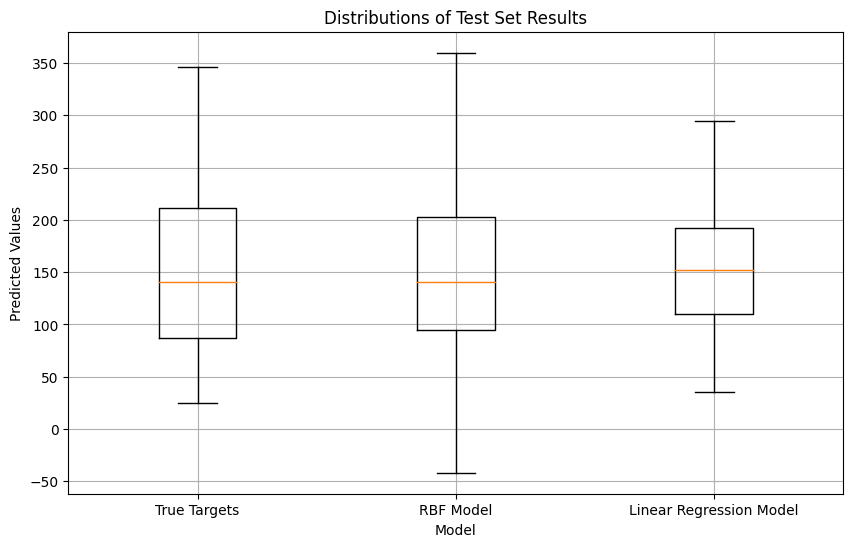

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Initialize lists to store predicted values from both models
predicted_values_rbf = []
predicted_values_linear = []
true_targets = []

# Initialize lists to store performance metrics
mse_scores_rbf = []
mse_scores_linear = []

# Initialize KFold object
kf = KFold(n_splits=10)

# Iterate over folds
for train_index, test_index in kf.split(Xnorm):
    # Get train and test data
    X_train, X_test = Xnorm[train_index], Xnorm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # RBF Model
    # Construct the design matrix for training data
    U_train = np.zeros((len(X_train), M))
    for i in range(len(X_train)):
        for j in range(M):
            U_train[i, j] = gaussian(X_train[i, :], C[j, :], sigma)

    # Pseudo inverse solution for linear part
    l = np.linalg.inv(U_train.T @ U_train) @ U_train.T @ y_train

    # Construct the design matrix for test data
    U_test = np.zeros((len(X_test), M))
    for i in range(len(X_test)):
        for j in range(M):
            U_test[i, j] = gaussian(X_test[i, :], C[j, :], sigma)

    # Predicted values on test data
    yh_test = U_test @ l
    predicted_values_rbf.extend(yh_test)

    # Calculate MSE for RBF model
    mse_rbf = mean_squared_error(y_test, yh_test)
    mse_scores_rbf.append(mse_rbf)

    # Linear Regression Model
    # Train linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predicted values on test data for linear regression model
    yh_test_linear = lr_model.predict(X_test)
    predicted_values_linear.extend(yh_test_linear)

    true_targets.extend(y_test)

    # Calculate MSE for linear regression model
    mse_linear = mean_squared_error(y_test, yh_test_linear)
    mse_scores_linear.append(mse_linear)

# Create boxplots
plt.figure(figsize=(10, 6))

plt.boxplot([true_targets, predicted_values_rbf, predicted_values_linear], labels=['True Targets', 'RBF Model', 'Linear Regression Model'])
plt.title('Distributions of Test Set Results')
plt.ylabel('Predicted Values')
plt.xlabel('Model')
plt.grid(True)
plt.show()


In [ ]:
print(mse_scores_rbf)
print(mse_scores_linear)

[8308.649896856612, 4768.983740293613, 3977.465729636817, 5896.527369469095, 5100.373988769824, 5586.077351385926, 8714.584104148245, 9158.448446517004, 9657.524545075765, 5010.845996458262]
[2533.8401785570395, 2870.777583413463, 3512.729148354787, 2759.2085595071567, 3555.6940240832405, 2900.3454004553955, 3696.3310254753687, 2282.33961544464, 4122.994892760741, 1769.6424735565922]


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yh_test_linear, color='blue', alpha=0.5)
plt.title('Linear Regression: True vs. Predicted Values')
plt.xlabel('True Target')
plt.ylabel('Predicted Target')
plt.grid(True)
plt.show()

In [ ]:
# Initialize KFold object
kf = KFold(n_splits=10)

# Iterate over folds
for i, (train_index, test_index) in enumerate(kf.split(Xnorm), 1):
    # Get train and test data
    X_train, X_test = Xnorm[train_index], Xnorm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predicted values on test data for linear regression model
    yh_test_linear = lr_model.predict(X_test)

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, yh_test_linear, color='blue', alpha=0.5)
    plt.title(f'Linear Regression: True vs. Predicted Values (Fold {i})')
    plt.xlabel('True Target')
    plt.ylabel('Predicted Target')
    plt.grid(True)
    plt.show()


**2 Multi-Layer Perceptron (MLP)**

Text(0.5, 1.0, 'Test Data Distributions')

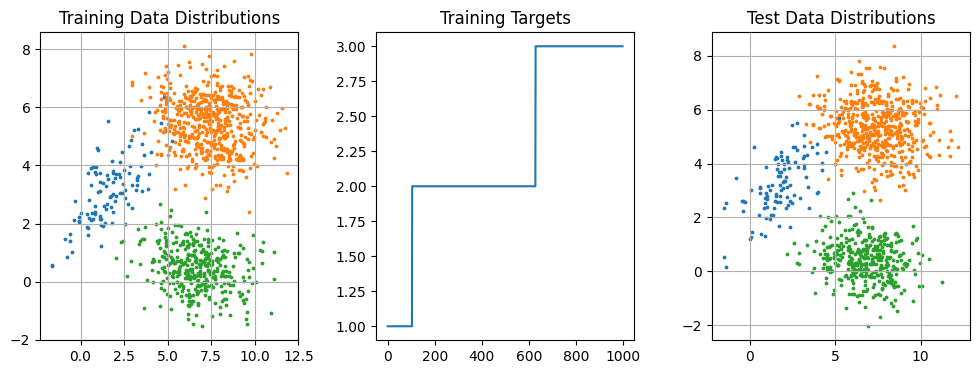

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def genGaussianSamples(N, m, C):
  A = np.linalg.cholesky(C)
  U = np.random.randn(N,2)

  return(U @ A.T + m)

NClasses = 3

# Priors
#
w = np.random.rand(NClasses)
w = w / np.sum(w)
N = 1000 # total data (Training = Test)
NPrior = np.floor(w * N).astype(int)

Scale = 10
Means = Scale*np.random.rand(NClasses, 2)

from sklearn.datasets import make_spd_matrix
CovMatrices = np.zeros((NClasses,2,2))
for j in range(NClasses):
  CovMatrices[j,:,:] = make_spd_matrix(2)

AllData_train = list()
for j in range(NClasses):
  AllData_train.append(genGaussianSamples(NPrior[j], Means[j,:], CovMatrices[j,:,:]))

X_train = AllData_train[0]
y_train = np.ones((NPrior[0], 1))
for j in range(NClasses-1):
  Xj = genGaussianSamples(NPrior[j+1], Means[j+1,:], CovMatrices[j+1,:,:])
  X_train = np.append(X_train, Xj, axis=0)
  yj = (j+2)*np.ones((NPrior[j+1], 1))
  y_train = np.append(y_train, yj)

AllData_test = list()
for j in range(NClasses):
  AllData_test.append(genGaussianSamples(NPrior[j], Means[j,:], CovMatrices[j,:,:]))

X_test = AllData_test[0]
y_test = np.ones((NPrior[0], 1))
for j in range(NClasses-1):
  Xj = genGaussianSamples(NPrior[j+1], Means[j+1,:], CovMatrices[j+1,:,:])
  X_test = np.append(X_test, Xj, axis=0)
  yj = (j+2)*np.ones((NPrior[j+1], 1))
  y_test = np.append(y_test, yj)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
plt.subplots_adjust(wspace=0.3)
for j in range(NClasses):
  Xplt = AllData_train[j]
  ax[0].scatter(Xplt[:,0], Xplt[:,1], s=3)
ax[0].grid(True)
ax[0].set_title("Training Data Distributions")

ax[1].plot(y_train)
ax[1].set_title("Training Targets")

for j in range(NClasses):
  Xplt = AllData_test[j]
  ax[2].scatter(Xplt[:,0], Xplt[:,1], s=3)
ax[2].grid(True)
ax[2].set_title("Test Data Distributions")

In [ ]:
# Encoding the output
#
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
y_onehot_train = onehot_encoder.fit_transform(y_train.reshape(-1, 1))

# Training a neural network
#
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_onehot_train)

# Predictions, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred_train = clf.predict(X_train)
print(accuracy_score(y_onehot_train, y_pred_train))

N_train = X_train.shape[0]
predicted_class_train = np.zeros((N_train,1))
for j in range(N_train):
  predicted_class_train[j] = (1+np.argmax(y_pred_train[j,:])).astype(int)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_train, predicted_class_train))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9789579158316634
Confusion Matrix: 
[[ 96   8   0]
 [  4 520   0]
 [  4   0 366]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


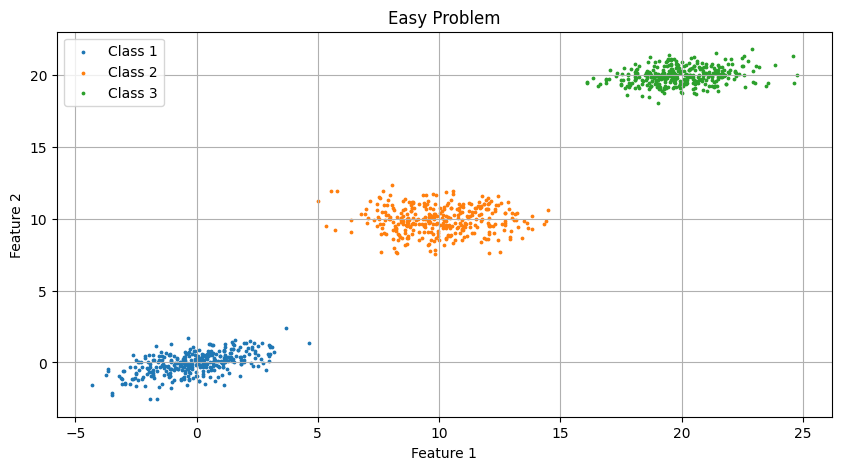

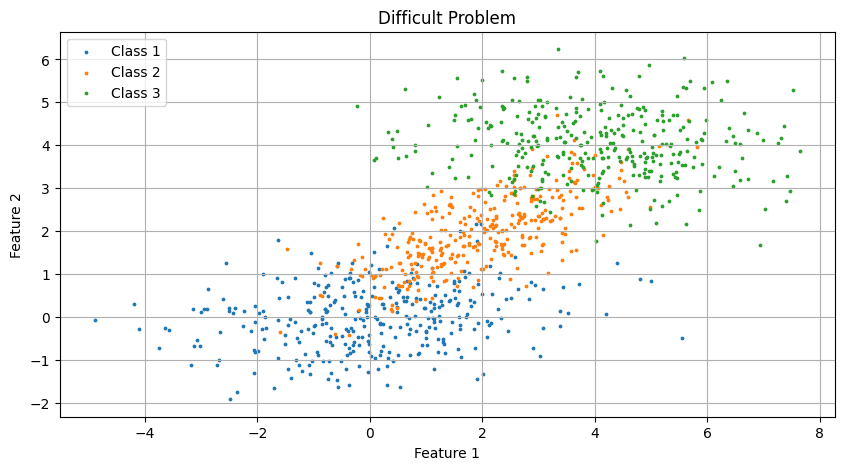

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix

def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return(U @ A.T + m)

NClasses = 3
N = 1000  # Total data points for each problem

# Set parameters for the relatively easy problem
means_easy = np.array([[0, 0], [10, 10], [20, 20]])  # Far apart means
cov_matrices_easy = np.zeros((NClasses, 2, 2))
for j in range(NClasses):
    cov_matrices_easy[j, :, :] = make_spd_matrix(2)  # Generate random positive definite matrices

# Set parameters for the difficult problem
means_difficult = np.array([[0, 0], [2, 2], [4, 4]])  # Closer means
cov_matrices_difficult = np.zeros((NClasses, 2, 2))
for j in range(NClasses):
    cov_matrices_difficult[j, :, :] = make_spd_matrix(2)  # Generate random positive definite matrices

# Generate data for each problem
easy_data = []
difficult_data = []
for j in range(NClasses):
    easy_data.append(genGaussianSamples(int(N / NClasses), means_easy[j, :], cov_matrices_easy[j, :, :]))
    difficult_data.append(genGaussianSamples(int(N / NClasses), means_difficult[j, :], cov_matrices_difficult[j, :, :]))

# Plot the distributions for the easy problem
plt.figure(figsize=(10, 5))
for j in range(NClasses):
    plt.scatter(easy_data[j][:, 0], easy_data[j][:, 1], s=3, label=f"Class {j+1}")
plt.title("Easy Problem")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Plot the distributions for the difficult problem
plt.figure(figsize=(10, 5))
for j in range(NClasses):
    plt.scatter(difficult_data[j][:, 0], difficult_data[j][:, 1], s=3, label=f"Class {j+1}")
plt.title("Difficult Problem")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(easy_data[0].shape)

(333, 2)


In [21]:
# bayesean classifier

class BayesianClassifier:
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        self.class_priors = {c: np.mean(y_train == c) for c in self.classes}
        self.class_means = {c: np.mean(X_train[y_train == c], axis=0) for c in self.classes}
        self.class_variances = {c: np.var(X_train[y_train == c], axis=0) for c in self.classes}

    def predict_proba(self, X):
        posteriors = np.zeros((X.shape[0], len(self.classes)))
        for i, c in enumerate(self.classes):
            likelihood = np.prod(norm.pdf(X, loc=self.class_means[c], scale=np.sqrt(self.class_variances[c])), axis=1)
            posteriors[:, i] = likelihood * self.class_priors[c]
        # Normalize posteriors
        posteriors /= np.sum(posteriors, axis=1, keepdims=True)
        return posteriors

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

**Training for the easy problem**

In [22]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from scipy.stats import norm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Encoding the output
onehot_encoder = OneHotEncoder(sparse=False)
#y_onehot_train = onehot_encoder.fit_transform(y_train.reshape(-1, 1))

clf = MLPClassifier()

# Initialize KFold object
kf = KFold(n_splits=10)

# Lists to store accuracies
mlp_accuracies_easy = []
bayesian_accuracies_easy = []


# Perform ten-fold cross-validation
for train_index, test_index in kf.split(easy_data[0]):
    X_train_fold, X_val_fold = np.concatenate([easy_data[i][train_index] for i in range(NClasses)]), np.concatenate([easy_data[i][test_index] for i in range(NClasses)])
    y_train_fold, y_val_fold = np.concatenate([i * np.ones(len(train_index)) for i in range(NClasses)]), np.concatenate([i * np.ones(len(test_index)) for i in range(NClasses)])

    # Classifying using MLP

    y_onehot_train = onehot_encoder.fit_transform(y_train_fold.reshape(-1, 1))
    # Train the neural network
    clf.fit(X_train_fold, y_onehot_train)

    # Predictions, accuracy and confusion matrix
    y_pred_train = clf.predict(X_train_fold)
    print(accuracy_score(y_onehot_train, y_pred_train))

    N_train = X_train_fold.shape[0]
    predicted_class_train = np.zeros((N_train,1))
    for j in range(N_train):
      predicted_class_train[j] = (1+np.argmax(y_pred_train[j,:])).astype(int)

    # from sklearn.metrics import confusion_matrix
    # print("Confusion Matrix: ")
    # print(confusion_matrix(y_train, predicted_class_train))

    # Calculate accuracy for MLP
    mlp_accuracy = accuracy_score(y_train_fold+1, predicted_class_train) #I added as y_train_fold + 1 because in y_train_fold list classes are 0, 1, 2 instead of 1, 2, 3
    mlp_accuracies_easy.append(mlp_accuracy)


    # Classifying using Bayes
    bayesian_classifier = BayesianClassifier()
    bayesian_classifier.fit(X_train_fold, y_train_fold)
    y_pred_fold_bayesian = bayesian_classifier.predict(X_val_fold)

    # Calculate accuracy for Bayesian classifier
    bayesian_accuracy = accuracy_score(y_val_fold, y_pred_fold_bayesian)
    bayesian_accuracies_easy.append(bayesian_accuracy)

    # plt.figure(figsize=(12, 6))

    # # Plotting MLP predicted values
    # plt.subplot(1, 2, 2)
    # plt.boxplot(predicted_class_train)
    # plt.title('MLP Predicted Values (Iteration {})'.format(len(mlp_accuracies_easy)))
    # plt.ylabel('Class')
    # plt.xlabel('Sample')

    # # Plotting Bayesian predicted values
    # plt.subplot(1, 2, 1)
    # plt.boxplot(y_pred_fold_bayesian+1)
    # plt.title('Bayesian Predicted Values (Iteration {})'.format(len(bayesian_accuracies_easy)))
    # plt.ylabel('Class')
    # plt.xlabel('Sample')



    # plt.tight_layout()
    # plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1.0
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(predicted_class_train)

In [23]:
# Print accuracies
print("MLP Accuracies (Easy Problem):", mlp_accuracies_easy)
print("Bayesian Accuracies (Easy Problem):", bayesian_accuracies_easy)

MLP Accuracies (Easy Problem): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Bayesian Accuracies (Easy Problem): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


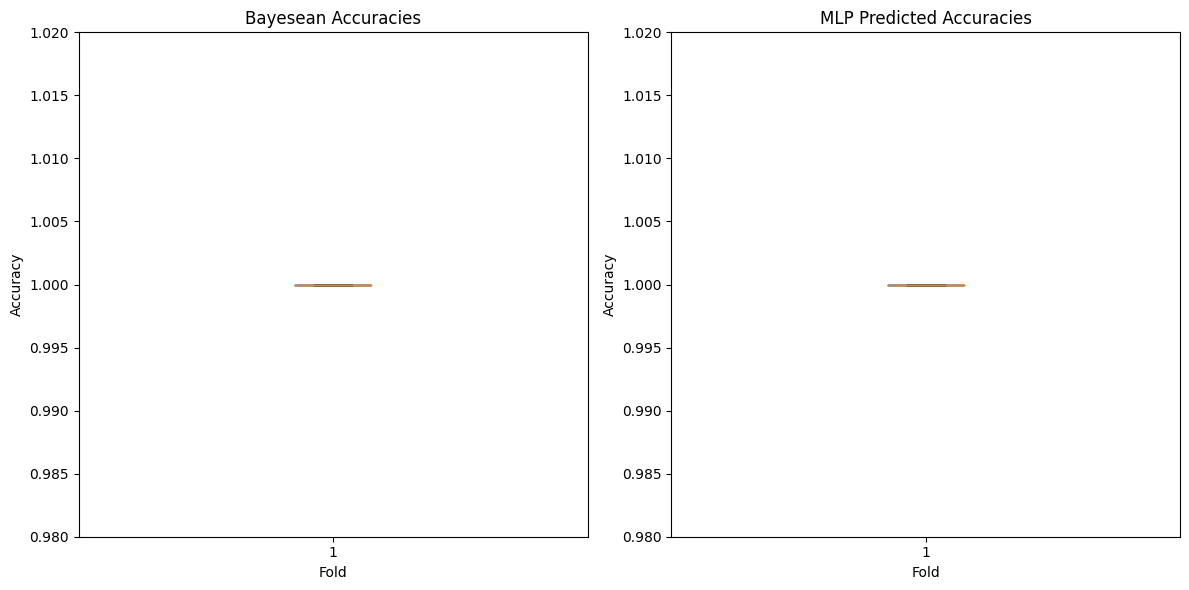

In [24]:
import matplotlib.pyplot as plt

# Plotting predicted values
plt.figure(figsize=(12, 6))

# Plotting Bayesian predicted values
plt.subplot(1, 2, 1)
plt.boxplot(bayesian_accuracies_easy)
plt.title('Bayesean Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.ylim(0.98, 1.02)  # Set y-axis range

# Plotting MLP predicted values
plt.subplot(1, 2, 2)
plt.boxplot(mlp_accuracies_easy)
plt.title('MLP Predicted Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.ylim(0.98, 1.02)  # Set y-axis range

plt.tight_layout()
plt.show()


In [25]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import norm
import matplotlib.pyplot as plt

# Encoding the output
onehot_encoder = OneHotEncoder(sparse=False)

# Initialize MLP classifier
clf = MLPClassifier()

# Initialize KFold object
kf = KFold(n_splits=10)

# Lists to store accuracies
mlp_accuracies_hard = []
bayesian_accuracies_hard = []

# Perform ten-fold cross-validation
for train_index, test_index in kf.split(difficult_data[0]):
    X_train_fold = np.concatenate([difficult_data[i][train_index] for i in range(NClasses)])
    X_val_fold = np.concatenate([difficult_data[i][test_index] for i in range(NClasses)])
    y_train_fold = np.concatenate([i * np.ones(len(train_index)) for i in range(NClasses)])
    y_val_fold = np.concatenate([i * np.ones(len(test_index)) for i in range(NClasses)])

    # Train the MLP classifier
    y_onehot_train = onehot_encoder.fit_transform(y_train_fold.reshape(-1, 1))
    clf.fit(X_train_fold, y_onehot_train)

    N_train = X_train_fold.shape[0]
    predicted_class_train = np.zeros((N_train,1))
    for j in range(N_train):
      predicted_class_train[j] = (1+np.argmax(y_pred_train[j,:])).astype(int)

    # Calculate accuracy for MLP
    mlp_accuracy = accuracy_score(y_train_fold+1, predicted_class_train)
    mlp_accuracies_hard.append(mlp_accuracy)



    # Classifying using Bayesian classifier
    bayesian_classifier = BayesianClassifier()
    bayesian_classifier.fit(X_train_fold, y_train_fold)
    y_pred_fold_bayesian = bayesian_classifier.predict(X_val_fold)

    # Calculate accuracy for Bayesian classifier
    bayesian_accuracy = accuracy_score(y_val_fold, y_pred_fold_bayesian)
    bayesian_accuracies_hard.append(bayesian_accuracy)

    # # Plotting predicted values
    # plt.figure(figsize=(12, 6))

    # # Plotting MLP predicted values
    # plt.subplot(1, 2, 2)
    # plt.boxplot(predicted_class_train)
    # #plt.title('MLP Predicted Values (Iteration {})'.format(len(mlp_accuracies_difficult)))
    # plt.ylabel('Class')
    # plt.xlabel('Sample')

    # # Plotting Bayesian predicted values
    # plt.subplot(1, 2, 1)
    # plt.boxplot(y_pred_fold_bayesian)
    # #plt.title('Bayesian Predicted Values (Iteration {})'.format(len(bayesian_accuracies_difficult)))
    # plt.ylabel('Class')
    # plt.xlabel('Sample')

    # plt.tight_layout()
    # plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/u

In [26]:
# Print accuracies
print("MLP Accuracies (Hard Problem):", mlp_accuracies_hard)
print("Bayesian Accuracies (Hard Problem):", bayesian_accuracies_hard)

MLP Accuracies (Hard Problem): [0.9966555183946488, 0.9966555183946488, 0.9966555183946488, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Bayesian Accuracies (Hard Problem): [0.8823529411764706, 0.8431372549019608, 0.8725490196078431, 0.8282828282828283, 0.8080808080808081, 0.8787878787878788, 0.8888888888888888, 0.8787878787878788, 0.8181818181818182, 0.8888888888888888]


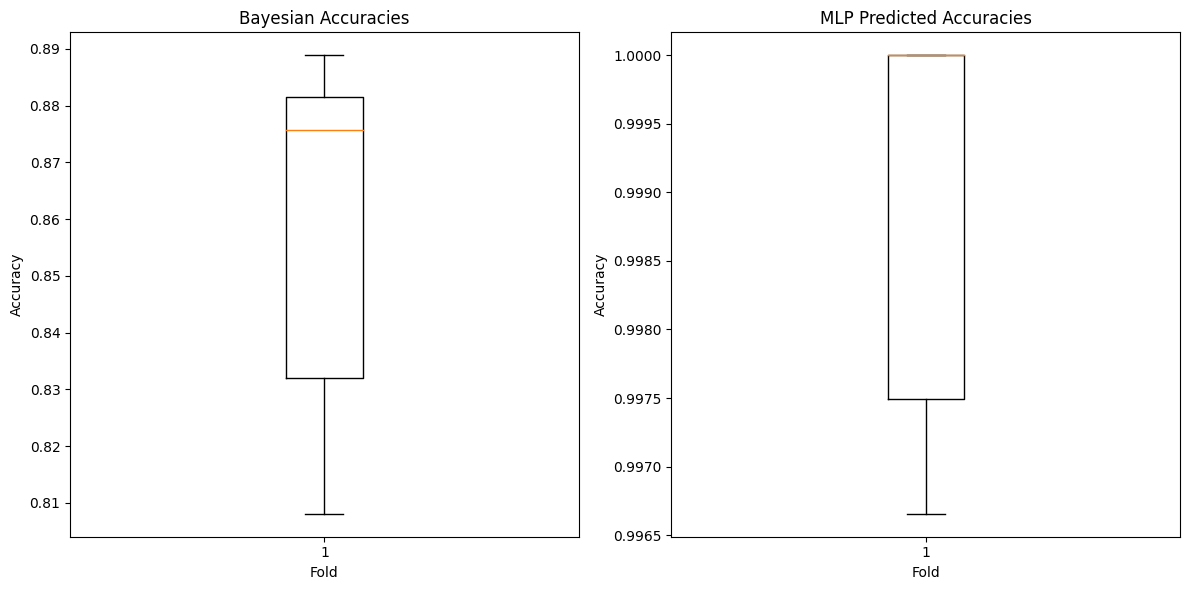

In [27]:
# Plotting predicted values
plt.figure(figsize=(12, 6))

# Plotting MLP predicted values
plt.subplot(1, 2, 2)
plt.boxplot(mlp_accuracies_hard)
plt.title('MLP Predicted Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Fold')

# Plotting Bayesian predicted values
plt.subplot(1, 2, 1)
plt.boxplot(bayesian_accuracies_hard)
plt.title('Bayesian Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Fold')

plt.tight_layout()
plt.show()

**part 3**

In [28]:
from sklearn.model_selection import KFold

# Initialize KFold object with one split
kf = KFold(n_splits=2)

# Get the first (and only) split
train_index, test_index = next(kf.split(difficult_data[0]))

# Create the training and validation sets
X_train_fold = np.concatenate([difficult_data[i][train_index] for i in range(NClasses)])
X_val_fold = np.concatenate([difficult_data[i][test_index] for i in range(NClasses)])
y_train_fold = np.concatenate([i * np.ones(len(train_index)) for i in range(NClasses)])
y_val_fold = np.concatenate([i * np.ones(len(test_index)) for i in range(NClasses)])


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


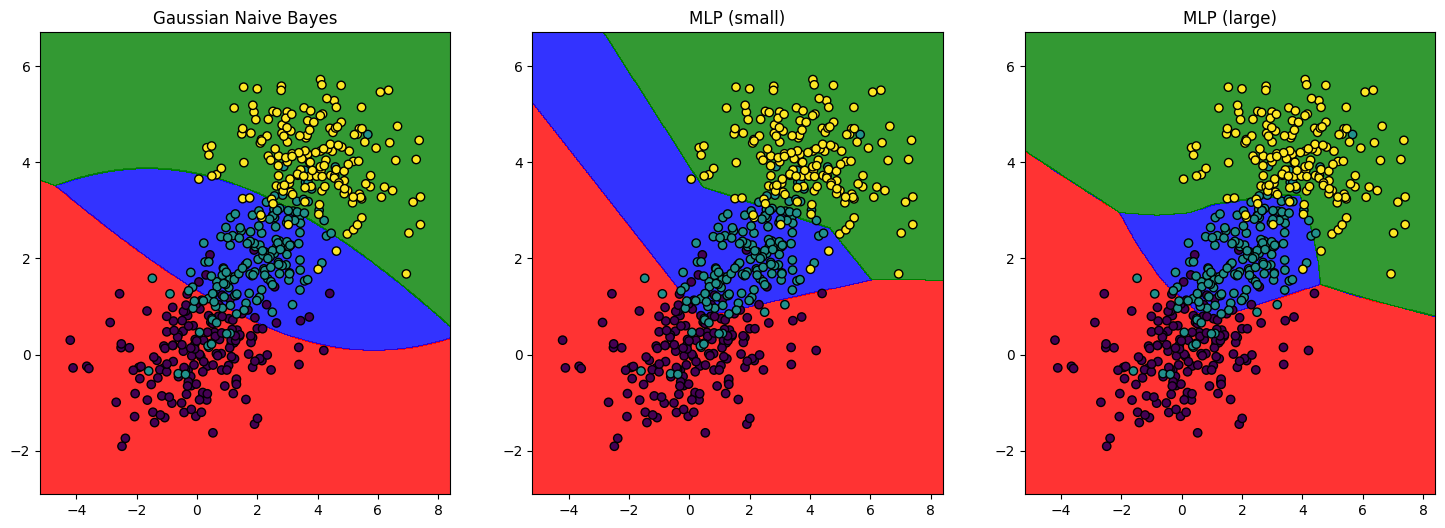

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the function to plot decision boundaries
def plot_decision_boundaries(X, y, classifier, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'blue', 'green')))

# Create the classifiers
gnb = GaussianNB()
mlp_small = MLPClassifier(hidden_layer_sizes=(5,), random_state=42, max_iter=1000)
mlp_large = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000)

# Fit the classifiers
gnb.fit(X_train_fold, y_train_fold)
mlp_small.fit(X_train_fold, y_train_fold)
mlp_large.fit(X_train_fold, y_train_fold)

# Plot the decision boundaries
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_decision_boundaries(X_train_fold, y_train_fold, gnb, axs[0])
axs[0].scatter(X_train_fold[:, 0], X_train_fold[:, 1], c=y_train_fold, edgecolors='k')
axs[0].set_title('Gaussian Naive Bayes')

plot_decision_boundaries(X_train_fold, y_train_fold, mlp_small, axs[1])
axs[1].scatter(X_train_fold[:, 0], X_train_fold[:, 1], c=y_train_fold, edgecolors='k')
axs[1].set_title('MLP (small)')

plot_decision_boundaries(X_train_fold, y_train_fold, mlp_large, axs[2])
axs[2].scatter(X_train_fold[:, 0], X_train_fold[:, 1], c=y_train_fold, edgecolors='k')
axs[2].set_title('MLP (large)')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


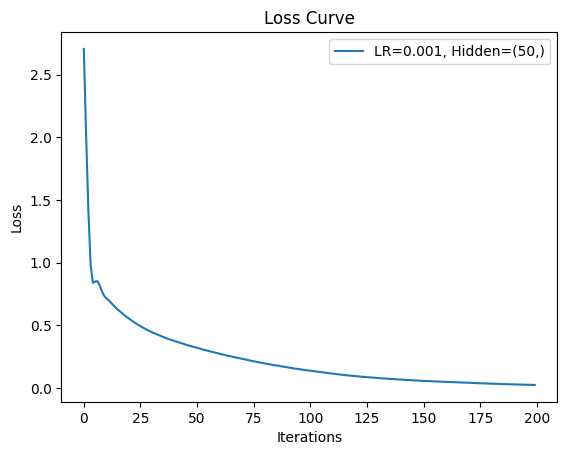

Accuracy (LR=0.001, Hidden=(50,)): 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


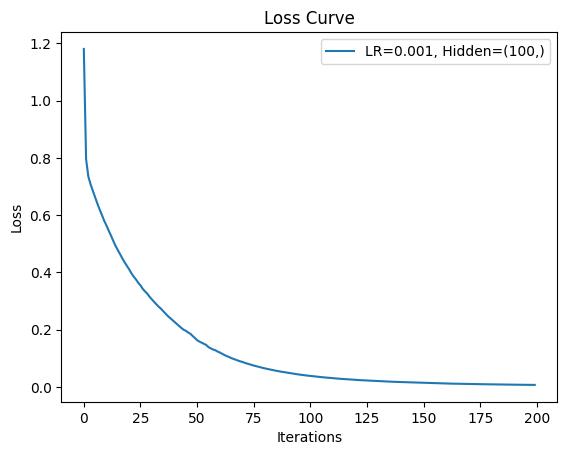

Accuracy (LR=0.001, Hidden=(100,)): 1.0000


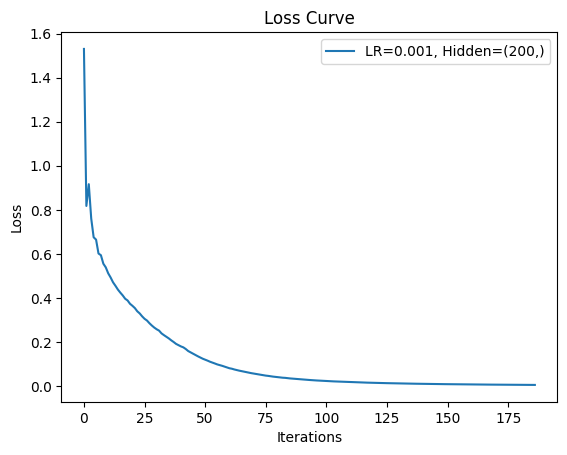

Accuracy (LR=0.001, Hidden=(200,)): 1.0000


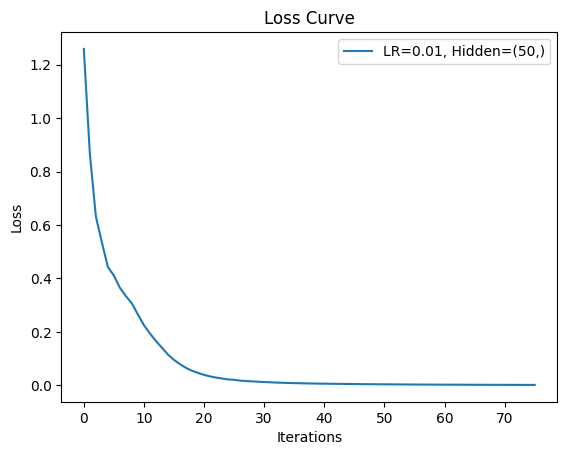

Accuracy (LR=0.01, Hidden=(50,)): 1.0000


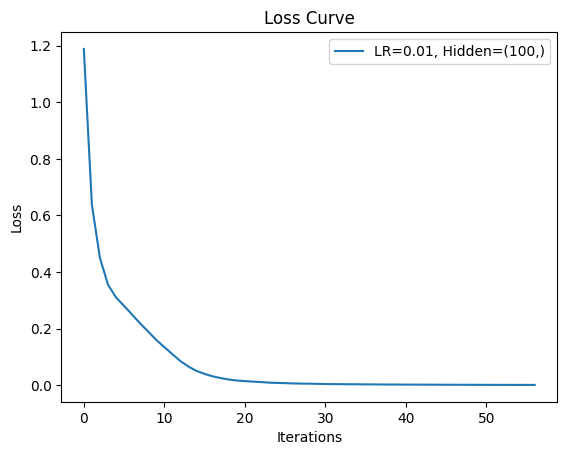

Accuracy (LR=0.01, Hidden=(100,)): 1.0000


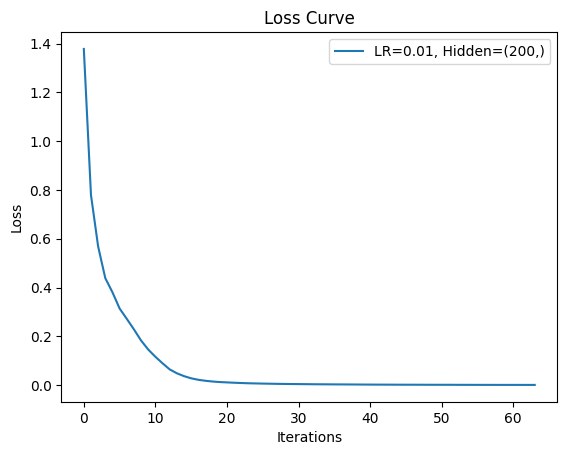

Accuracy (LR=0.01, Hidden=(200,)): 1.0000


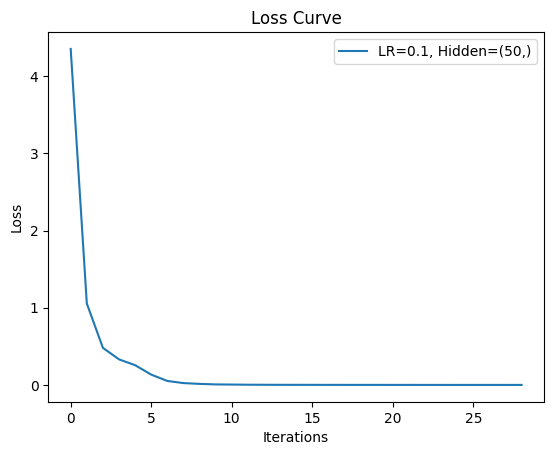

Accuracy (LR=0.1, Hidden=(50,)): 1.0000


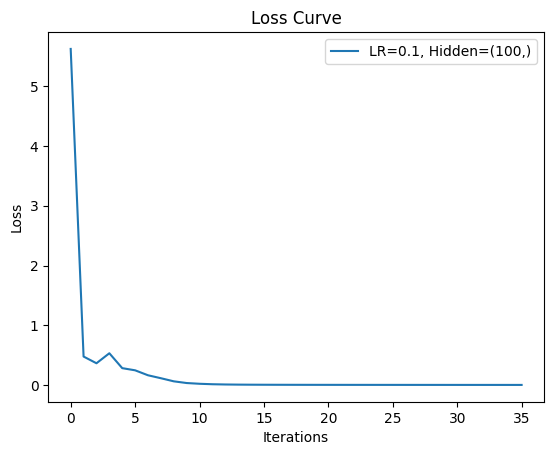

Accuracy (LR=0.1, Hidden=(100,)): 1.0000


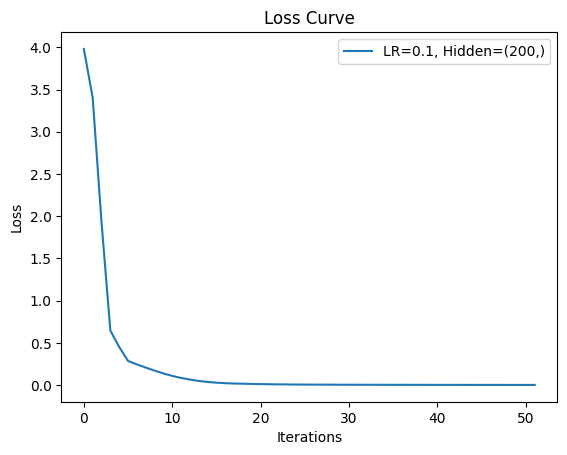

Accuracy (LR=0.1, Hidden=(200,)): 1.0000


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define different values for learning_rate_init and hidden_layer_sizes
learning_rates = [0.001, 0.01, 0.1]  # Different initial learning rates
hidden_sizes = [(50,), (100,), (200,)]  # Different sizes of hidden layers

# Train MLP classifiers with different combinations of parameters
for lr in learning_rates:
    for hidden_size in hidden_sizes:
        clf = MLPClassifier(hidden_layer_sizes=hidden_size, learning_rate_init=lr)
        clf.fit(X_train_fold, y_train_fold)

        # Evaluate convergence: Plot loss curve
        plt.plot(clf.loss_curve_, label=f"LR={lr}, Hidden={hidden_size}")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title("Loss Curve")
        plt.legend()
        plt.show()

        # Evaluate performance: Calculate accuracy on test data
        y_pred = clf.predict(X_val_fold)
        accuracy = accuracy_score(y_val_fold, y_pred)
        print(f"Accuracy (LR={lr}, Hidden={hidden_size}): {accuracy:.4f}")
